 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.237.202:5000/ (Press CTRL+C to quit)


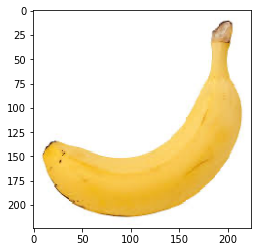

1/1 [==============================] - 0s 257ms/step


192.168.237.158 - - [05/Oct/2023 13:19:11] "GET /prediction HTTP/1.1" 200 -


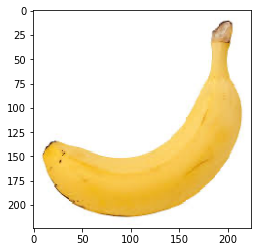

1/1 [==============================] - 0s 143ms/step


192.168.237.158 - - [05/Oct/2023 13:21:03] "GET /prediction HTTP/1.1" 200 -


{'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/5E969FBF-5EE3-4C2F-96D3-2A12C3273ACA.png?alt=media&token=ee3bae90-ac9b-4096-96ac-9789330bf4af'}
https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/5E969FBF-5EE3-4C2F-96D3-2A12C3273ACA.png?alt=media&token=ee3bae90-ac9b-4096-96ac-9789330bf4af


192.168.237.158 - - [05/Oct/2023 13:22:52] "POST /upload HTTP/1.1" 200 -


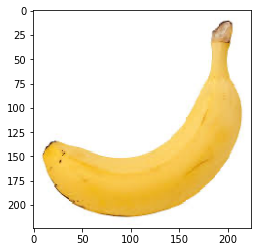

1/1 [==============================] - 0s 134ms/step


192.168.237.158 - - [05/Oct/2023 13:23:09] "GET /prediction HTTP/1.1" 200 -


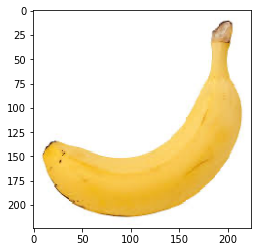

1/1 [==============================] - 0s 135ms/step


192.168.237.158 - - [05/Oct/2023 13:23:24] "GET /prediction HTTP/1.1" 200 -


{'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/25BDE1A1-B87D-4330-B1A0-118EF0DEF72C.png?alt=media&token=d49f6755-1c3f-48c9-9ac0-0cf46055dfd9'}
https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/25BDE1A1-B87D-4330-B1A0-118EF0DEF72C.png?alt=media&token=d49f6755-1c3f-48c9-9ac0-0cf46055dfd9


192.168.237.158 - - [05/Oct/2023 13:39:08] "POST /upload HTTP/1.1" 200 -


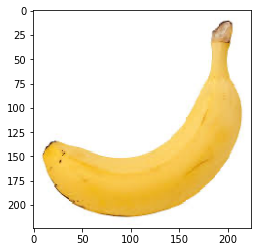

1/1 [==============================] - 0s 139ms/step


192.168.237.158 - - [05/Oct/2023 13:39:12] "GET /prediction HTTP/1.1" 200 -


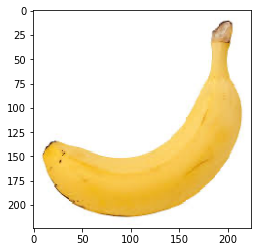

1/1 [==============================] - 0s 155ms/step


192.168.237.158 - - [05/Oct/2023 13:39:31] "GET /prediction HTTP/1.1" 200 -


{'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/913C31C6-2C83-4FA7-8222-1F8FCF900105.jpg?alt=media&token=d44fbce1-e772-48d6-844d-ef213ce0832b'}
https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/913C31C6-2C83-4FA7-8222-1F8FCF900105.jpg?alt=media&token=d44fbce1-e772-48d6-844d-ef213ce0832b


192.168.237.158 - - [05/Oct/2023 13:48:19] "POST /upload HTTP/1.1" 200 -


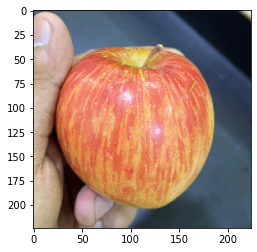

1/1 [==============================] - 0s 135ms/step


192.168.237.158 - - [05/Oct/2023 13:48:23] "GET /prediction HTTP/1.1" 200 -


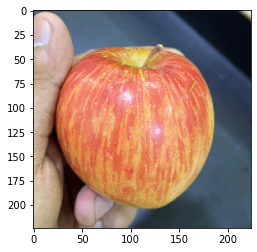

1/1 [==============================] - 0s 130ms/step


192.168.237.158 - - [05/Oct/2023 13:48:33] "GET /prediction HTTP/1.1" 200 -


{'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/9AFF1B3A-6EDC-4645-8B3D-4BCC9A2B7723.jpg?alt=media&token=813410d6-ca68-4ec5-a075-5f28e05802fa'}
https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/9AFF1B3A-6EDC-4645-8B3D-4BCC9A2B7723.jpg?alt=media&token=813410d6-ca68-4ec5-a075-5f28e05802fa


192.168.237.158 - - [05/Oct/2023 13:50:46] "POST /upload HTTP/1.1" 200 -


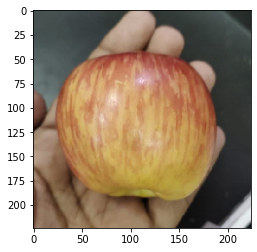

In [ ]:
from flask import Flask, request
import PIL
import requests
import os
from flask_cors import CORS, cross_origin
from keras_preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
app = Flask(__name__)
cors = CORS(app)
app.config['CORS_HEADERS'] = 'Content-Type'

class_names = [
    'apple',
    'banana',
    'beetroot',
    'bell pepper',
    'cabbage',
    'capsicum',
    'carrot',
    'cauliflower',
    'chilli pepper',
    'corn',
    'cucumber',
    'eggplant',
    'garlic',
    'ginger',
    'grapes',
    'jalepeno',
    'kiwi',
    'lemon',
    'lettuce',
    'mango',
    'onion',
    'orange',
    'paprika',
    'pear',
    'peas',
    'pineapple',
    'pomegranate',
    'potato',
    'raddish',
    'soy beans',
    'spinach',
    'sweetcorn',
    'sweetpotato',
    'tomato',
    'turnip',
    'watermelon'
]


@app.route('/upload', methods=['POST'])
@cross_origin()
def upload_image():
    try:

        # Handle the image (e.g., save it to a directory or process it)
#         image.save('uploads/' + image.filename)

        print(eval(request.data))
        img_url = eval(request.data)
        img_url = img_url["imageUrl"]
        print(img_url)
        response = requests.get(img_url)
        if response.status_code:
            fp = open('img.png', 'wb')
            fp.write(response.content)
            fp.close()
        return "image"
    except Exception as e:
        return str(e)

@app.route("/prediction", methods=["GET"])
def prediction():
    model = tf.keras.models.load_model('./mo.h5')
    image_path="./img.png"
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    label = np.argmax(pred, axis=1)
    return {"data": class_names[np.argmax(pred)]}
    
if __name__=="__main__":
    app.run(host="192.168.237.202", port=5000)

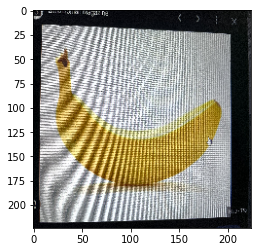

1/1 [==============================] - 0s 213ms/step
Predicted: pineapple


In [36]:
from keras_preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('./mo.h5')
image_path="./img.png"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Predicted: "+class_names[np.argmax(pred)])

In [28]:
!pip install keras_preprocessing

In [19]:
a = eval(b'{"imageUrl":"https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/1CF0F2CF-CACC-4DC3-9934-C5F27400708F.jpg?alt=media&token=980f553a-d557-4895-83f2-054801af3603"}')

In [20]:
a["imageUrl"]

'https://firebasestorage.googleapis.com/v0/b/nutriplus-5fc29.appspot.com/o/1CF0F2CF-CACC-4DC3-9934-C5F27400708F.jpg?alt=media&token=980f553a-d557-4895-83f2-054801af3603'